In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import manhattan_distances
from glob import glob
import matplotlib.pyplot as plt

In [3]:
csvs = glob('/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735/*.RECIST')
csvs

['/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735/itrp_tpm_combination_0000000000.pkl.score.RECIST']

In [4]:
dfs = []
for csv in csvs:
    df = pd.read_csv(csv, index_col=0)
    dfs.append(df)

In [12]:
df = pd.concat(dfs)
df['mean'] = df.prc*0.6 + df.roc*0.4
df = df.sort_values('mean', ascending=False)
df = df[(df.roc > 0.62) & (df.prc > 0.55)]

In [13]:
df

,prc,roc,mean
gene_name,,,
PIK3CD - ATG12,0.589012,0.670170,0.621475
PIK3CD - GPATCH3,0.587395,0.669499,0.620236
PIK3CD - BCL2L1,0.579630,0.676685,0.618452
PIK3CD - TYK2,0.575800,0.676847,0.616219
PIK3CD - SERPINB2,0.570055,0.684867,0.615980
...,...,...,...
SLAMF7 - LTBR,0.550717,0.630620,0.582678
PIK3CD - KIR3DL1,0.551618,0.629159,0.582634
SLAMF7 - SBNO2,0.550484,0.626436,0.580865


In [14]:
df1 = df
df2 = pd.DataFrame(df1.index.map(lambda x:x.split(' - ')).tolist(), index=df1.index)
df2.columns = ['g1', 'g2']
df1 = df1.join(df2)
df1['g1_count'] = df1.g1.map(df1.g1.value_counts())
df1['g2_count'] = df1.g2.map(df1.g2.value_counts())
df1

,prc,roc,mean,g1,g2,g1_count,g2_count
gene_name,,,,,,,
PIK3CD - ATG12,0.589012,0.670170,0.621475,PIK3CD,ATG12,23,10
PIK3CD - GPATCH3,0.587395,0.669499,0.620236,PIK3CD,GPATCH3,23,1
PIK3CD - BCL2L1,0.579630,0.676685,0.618452,PIK3CD,BCL2L1,23,2
PIK3CD - TYK2,0.575800,0.676847,0.616219,PIK3CD,TYK2,23,3
PIK3CD - SERPINB2,0.570055,0.684867,0.615980,PIK3CD,SERPINB2,23,5
...,...,...,...,...,...,...,...
SLAMF7 - LTBR,0.550717,0.630620,0.582678,SLAMF7,LTBR,10,1
PIK3CD - KIR3DL1,0.551618,0.629159,0.582634,PIK3CD,KIR3DL1,23,1
SLAMF7 - SBNO2,0.550484,0.626436,0.580865,SLAMF7,SBNO2,10,2


In [16]:
df1.g1.unique()

array(['PIK3CD', 'IL6R', 'RUNX3', 'CFP', 'STAT4', 'SLAMF6', 'SLAMF7',
       'TLR10', 'TIGIT', 'CR2', 'BATF', 'MICB', 'CD3G', 'LILRB1', 'CD6',
       'CARD11', 'NCR1', 'LY9', 'CASP1', 'CCR4', 'TNFRSF13C'],
      dtype=object)

In [17]:
df1.g2.unique()

array(['ATG12', 'GPATCH3', 'BCL2L1', 'TYK2', 'SERPINB2', 'FEZ1', 'ABL1',
       'TOLLIP', 'ZKSCAN5', 'MAP2K2', 'SMAD2', 'EIF2B4', 'TLK2', 'IKBKB',
       'MRPS5', 'IL22RA1', 'TICAM1', 'DMBT1', 'RIPK2', 'TFE3', 'IL10',
       'PSEN1', 'LRP1', 'TNFRSF1A', 'PRPF38A', 'TNFRSF4', 'COG7',
       'CREBBP', 'ATG7', 'ICOSLG', 'TIRAP', 'EPCAM', 'CC2D1B', 'TGFB2',
       'ECSIT', 'IL17RB', 'FAS', 'SBNO2', 'TMUB2', 'CSF1', 'NUBP1',
       'IL1RL1', 'CNOT4', 'BAX', 'IRF3', 'MYD88', 'MEF2C', 'CD164', 'ENG',
       'CCL11', 'TNFRSF11A', 'LTBR', 'KIR3DL1', 'TICAM2', 'IL27'],
      dtype=object)

In [18]:
#df1.loc['MAP4K1 - TBX3']

In [21]:
import sys,os
sys.path.insert(0, '/home/was966/Research/PSOG/')
from gdd.correlation import pairwise_correlation
from gdd.combination import pairwise_combination
from gdd.score import Xy_score
from gdd.plot import plot_batch
BEST = ['PIK3CD', 'TOLLIP']
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735/'

tcga_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.TCGA.TABLE'))
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))
itrp_tpm_crt = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE.CORRECT'))

tcga_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.TCGA.TABLE'))
tcga_patient['cohort'] = tcga_patient.cancer_type
itrp_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.ITRP.TABLE'))
gene = pd.read_pickle(os.path.join(data_path, 'GENE.TABLE'))

dfp1 = itrp_tpm.join(itrp_patient.cohort)
dfp2 = tcga_tpm.join(tcga_patient.cohort)
dfp2 = dfp2[dfp2.cohort == 'TCGA-SKCM']
dfp = pd.concat([dfp1, dfp2])

In [24]:
df1.index[:10]

Index(['PIK3CD - ATG12', 'PIK3CD - GPATCH3', 'PIK3CD - BCL2L1',
       'PIK3CD - TYK2', 'PIK3CD - SERPINB2', 'IL6R - FEZ1', 'IL6R - ABL1',
       'IL6R - SERPINB2', 'PIK3CD - TOLLIP', 'PIK3CD - ZKSCAN5'],
      dtype='object', name='gene_name')

100%|##########| 1/1 [00:00<00:00, 1353.00it/s]


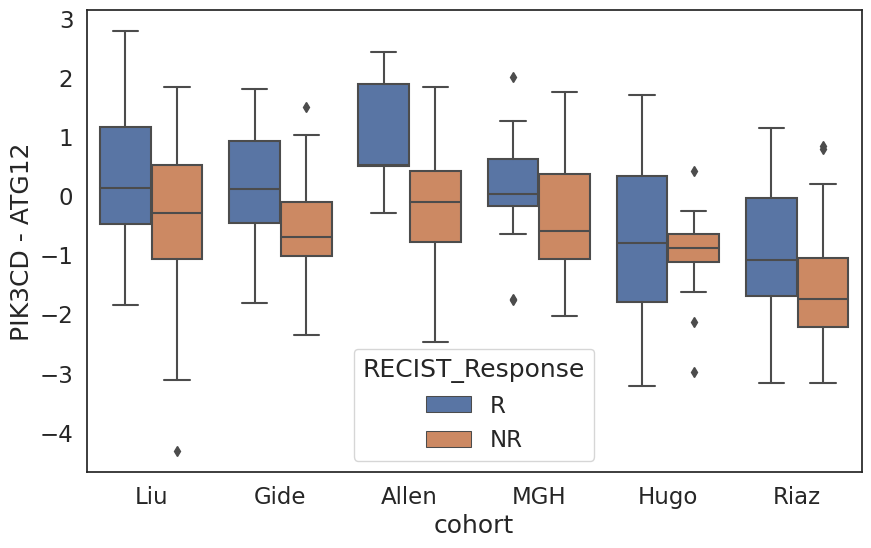

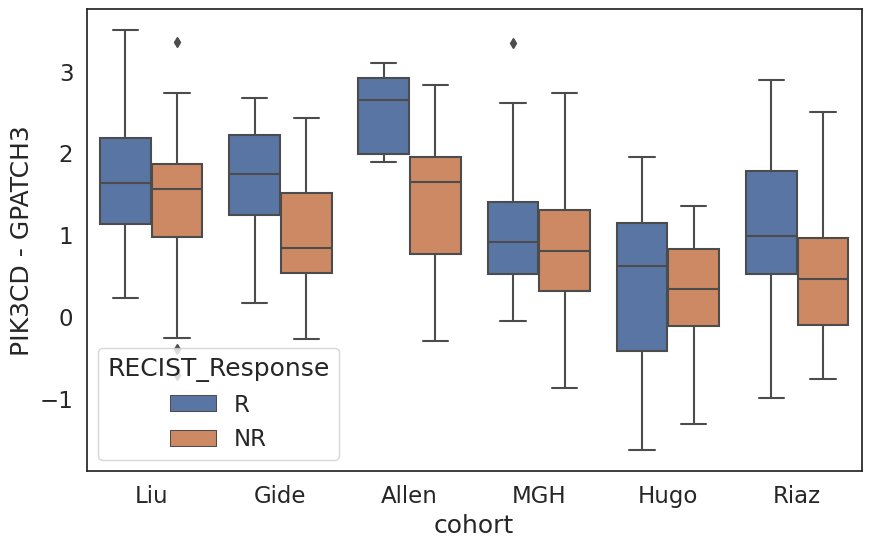

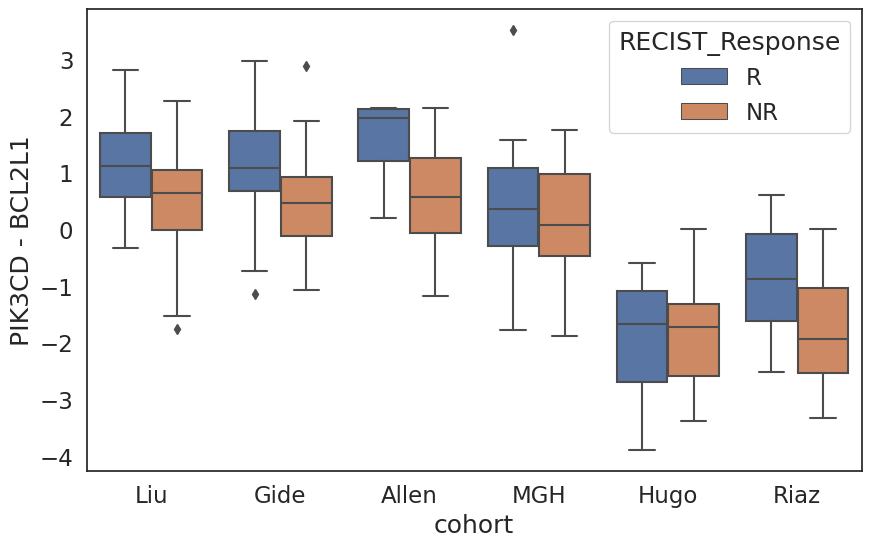

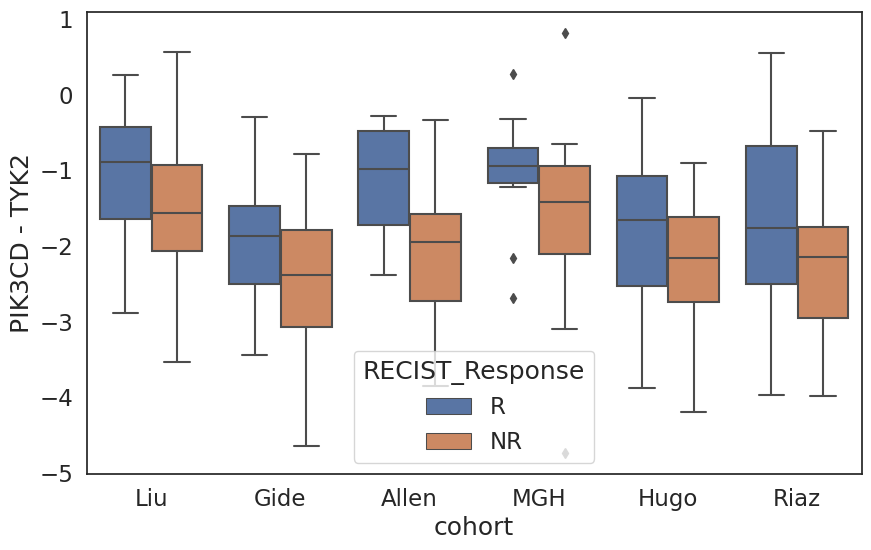

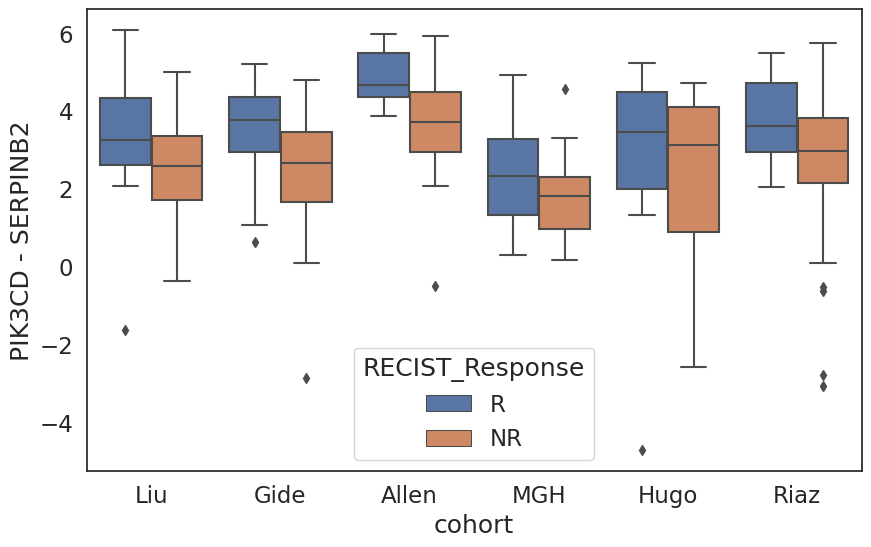

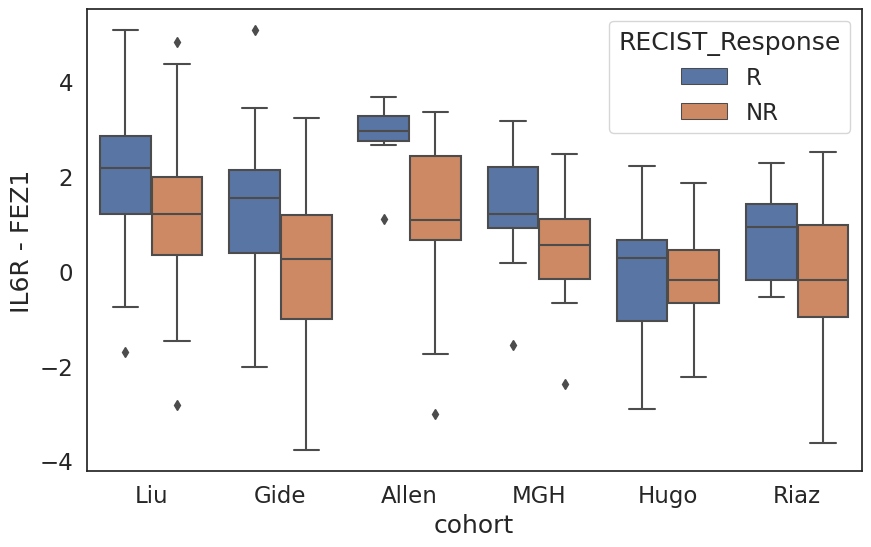

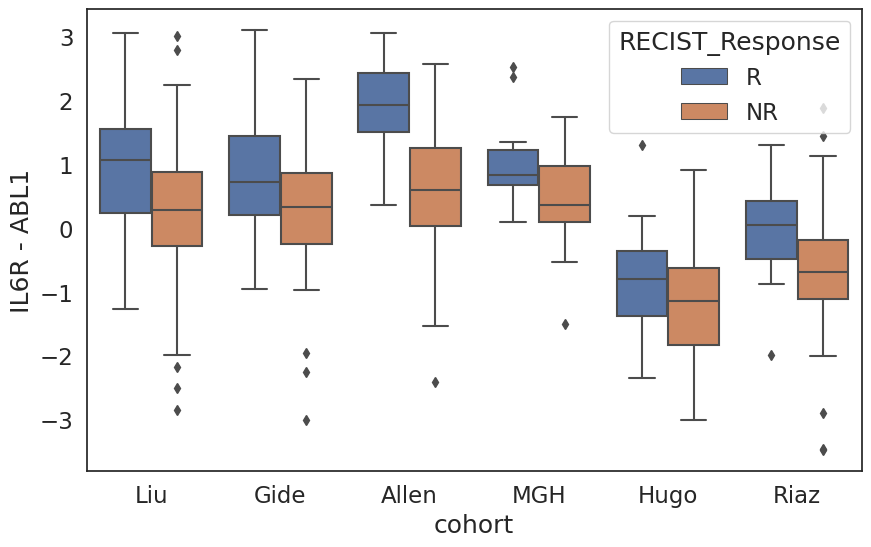

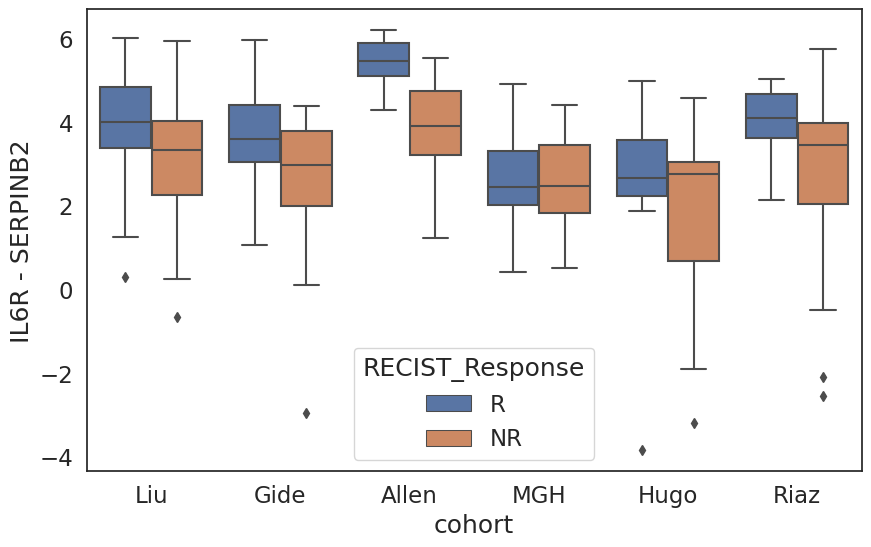

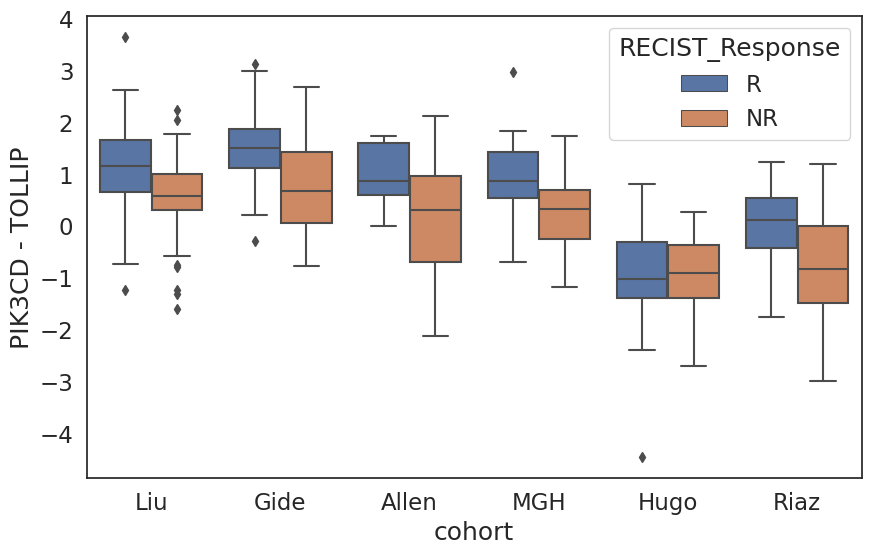

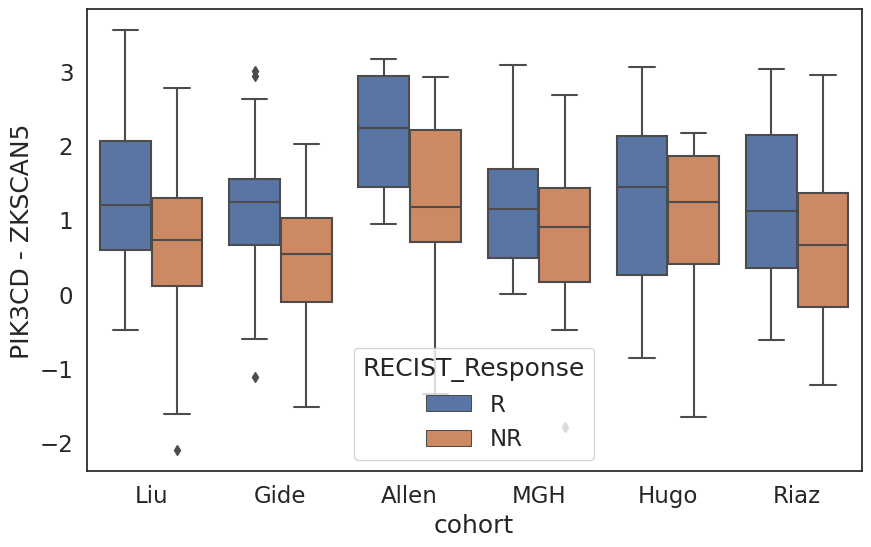

In [22]:
y_col = 'RECIST_Response'
for mk in df1.index[:10]:
    marker = mk.split(' - ')
    cohort_label = itrp_patient[['cohort', y_col]]
    pc = pairwise_combination(combination_pairs = [marker])
    marker_feature = pc.fit(itrp_tpm).transform()
    
    fname = marker_feature.columns[0]
    dfpp = marker_feature.join(cohort_label)
    dfpp = dfpp.dropna()
    fig,ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
    roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
    prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
    roc.join(prc)

In [23]:
roc.join(prc)

,,roc,prc
cohort,gene_name,,
Allen,PIK3CD - ZKSCAN5,0.723502,0.514828
Gide,PIK3CD - ZKSCAN5,0.747727,0.794291
Hugo,PIK3CD - ZKSCAN5,0.565476,0.684190
Liu,PIK3CD - ZKSCAN5,0.668998,0.606146
MGH,PIK3CD - ZKSCAN5,0.619048,0.492859
Riaz,PIK3CD - ZKSCAN5,0.610256,0.399223


In [ ]:
marker = ('DEFB110', 'SFTPA2') #MAP4K1 - AGER 
y_col = 'Freeman_response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1030.04it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.686391,0.511187
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.570399,0.466306
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.559722,0.225714


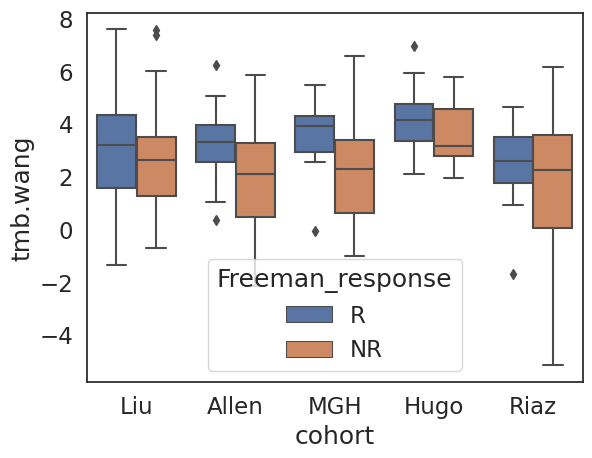

In [66]:
y_col = 'Freeman_response'
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1203.19it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.686391,0.511187
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.570399,0.466306
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.559722,0.225714


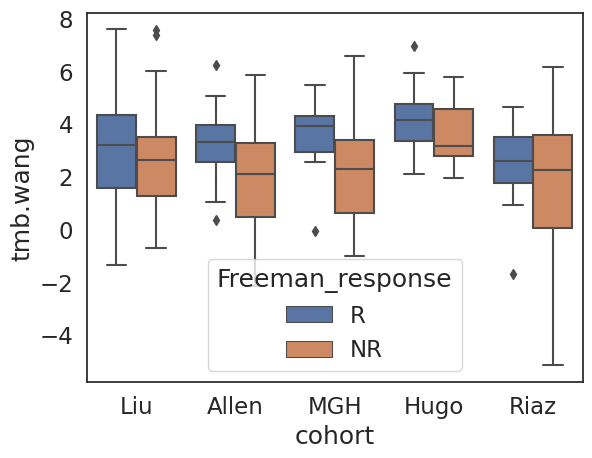

In [39]:
y_col = 'Freeman_response'
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()

sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1033.84it/s]


,,roc,prc
cohort,gene_name,,
Allen,PDCD1,0.569124,0.189959
Gide,PDCD1,0.764773,0.791750
Hugo,PDCD1,0.523810,0.508611
Liu,PDCD1,0.512044,0.421474
MGH,PDCD1,0.482143,0.452914
Riaz,PDCD1,0.647436,0.403527


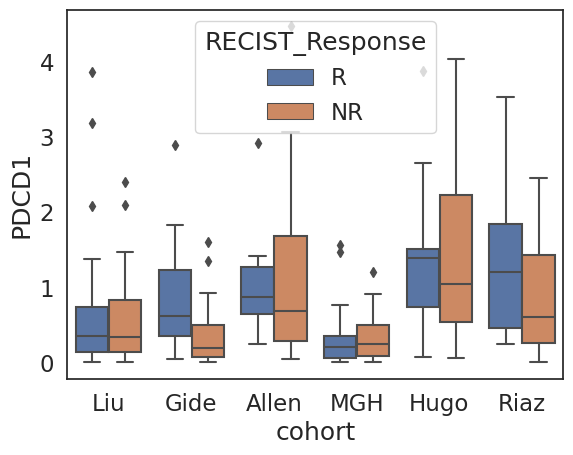

In [42]:
y_col = 'RECIST_Response'
marker_feature = itrp_tpm[['PDCD1']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 868.39it/s]


,,roc,prc
cohort,gene_name,,
Allen,CTLA4 - TNFSF4,0.692308,0.454082
Gide,CTLA4 - TNFSF4,0.704509,0.797291
Hugo,CTLA4 - TNFSF4,0.511905,0.513605
Liu,CTLA4 - TNFSF4,0.561715,0.519186
MGH,CTLA4 - TNFSF4,0.455357,0.353994
Riaz,CTLA4 - TNFSF4,0.578049,0.275657


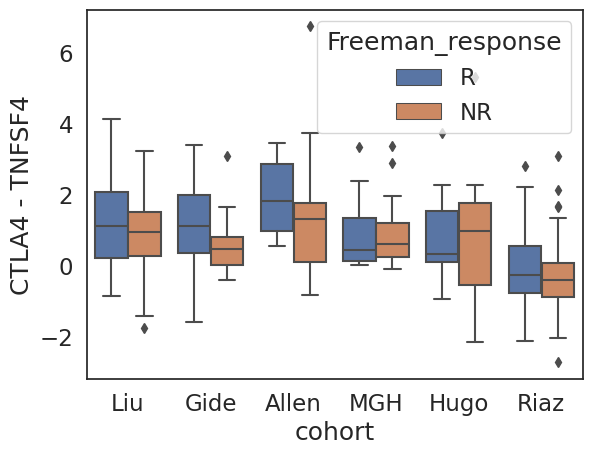

In [44]:
marker = ('CTLA4', 'TNFSF4') #MAP4K1 - AGER
y_col = 'Freeman_response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

In [ ]:
CD274 (PD-L1) expression, GEP, CYT, IMPRES, TIDE, and MHCII.7